In [1]:
from google.colab import drive
drive.mount('/content/drive')

%cd drive/My\ Drive/Datasets/Janata_hackathon_03

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/Datasets/Janata_hackathon_03


In [2]:
#Importing requires libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import category_encoders as ce
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
ms = StandardScaler()

np.random.seed(2020)
plt.rcParams['figure.figsize'] = 10,6

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
#Loading dataset
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [4]:
train_df.head(3)

,ID,datetime,temperature,var1,pressure,windspeed,var2,electricity_consumption
0,0,2013-07-01 00:00:00,-11.4,-17.1,1003.0,571.910,A,216.0
1,1,2013-07-01 01:00:00,-12.1,-19.3,996.0,575.040,A,210.0
2,2,2013-07-01 02:00:00,-12.9,-20.0,1000.0,578.435,A,225.0


In [5]:
test_df.head(3)

,ID,datetime,temperature,var1,pressure,windspeed,var2
0,552,2013-07-24 00:00:00,-10.0,-16.4,1011.0,263.280,A
1,553,2013-07-24 01:00:00,-10.0,-20.7,1011.0,267.175,A
2,554,2013-07-24 02:00:00,-10.7,-17.1,1003.0,269.555,A


In [6]:
train_df['var2'].value_counts()

A    25239
C     1040
B      217
Name: var2, dtype: int64

In [7]:
train_df.describe()

,ID,temperature,var1,pressure,windspeed,electricity_consumption
count,26496.000000,26496.000000,26496.000000,26496.000000,26496.000000,26496.000000
mean,17455.500000,5.098989,-1.916233,986.450615,23.959956,298.359601
std,10122.873673,8.682860,10.424860,12.002647,48.280321,108.020555
min,0.000000,-17.100000,-32.900000,953.000000,1.075000,174.000000
25%,8717.750000,-2.900000,-10.700000,978.000000,3.155000,219.000000
50%,17435.500000,6.400000,-1.400000,986.000000,6.545000,267.000000
75%,26177.250000,12.100000,7.900000,995.000000,22.260000,342.000000
max,34895.000000,23.600000,18.600000,1024.000000,586.600000,1386.000000


In [8]:
test_df.describe()

,ID,temperature,var1,pressure,windspeed
count,8568.000000,8568.000000,8568.000000,8568.000000,8568.000000
mean,17766.525210,5.112757,-1.726401,986.329599,24.176398
std,10117.296415,8.606167,10.345034,12.148517,49.651535
min,552.000000,-17.900000,-26.400000,954.000000,1.075000
25%,9317.750000,-2.100000,-10.000000,977.000000,3.155000
50%,18083.500000,5.700000,-2.100000,987.000000,6.295000
75%,26297.250000,12.100000,7.900000,995.000000,21.907500
max,35063.000000,25.700000,17.900000,1023.000000,491.255000


In [0]:
#one hot encoding var2 variable
Y = train_df['electricity_consumption'].values

ce_one = ce.OneHotEncoder(cols=['var2'])
train_df = ce_one.fit_transform(train_df.drop(['electricity_consumption'], axis=1))
test_df = ce_one.transform(test_df)

In [0]:
train_date = train_df['datetime']
train_df = train_df.drop(['datetime','ID'], axis=1)
ids = test_df['ID']
test_date = test_df['datetime']
test_df = test_df.drop(['datetime','ID'], axis=1)

In [0]:
#Instead of standardizing the dataframe as a whole, standardizing values for a month improved model's performance.
#this is beacause, standardizing in batches introduces a kind of noise, hence making the model more general in nature.
train_df['datetime'] = train_date
test_df['datetime'] = test_date
train_df['electricity_consumption'] = Y

## Visualizations

On plotting various continuous variables with time, we can see that target variable has an strong inverse relationship with windspeed and pressure.

In [12]:
i = 0
df = train_df.iloc[i*23*24:(i+1)*23*24]
df = df.copy()
df1 = df.copy()
df.head(3)

,temperature,var1,pressure,windspeed,var2_1,var2_2,var2_3,datetime,electricity_consumption
0,-11.4,-17.1,1003.0,571.910,1,0,0,2013-07-01 00:00:00,216.0
1,-12.1,-19.3,996.0,575.040,1,0,0,2013-07-01 01:00:00,210.0
2,-12.9,-20.0,1000.0,578.435,1,0,0,2013-07-01 02:00:00,225.0


In [0]:
if(df['var2_1'].nunique()==1):
  df = df.drop(['var2_1'], axis=1)
if(df['var2_2'].nunique()==1):
  df = df.drop(['var2_2'], axis=1)
if(df['var2_3'].nunique()==1):
  df = df.drop(['var2_3'], axis=1)

In [14]:
df.head()

,temperature,var1,pressure,windspeed,datetime,electricity_consumption
0,-11.4,-17.1,1003.0,571.910,2013-07-01 00:00:00,216.0
1,-12.1,-19.3,996.0,575.040,2013-07-01 01:00:00,210.0
2,-12.9,-20.0,1000.0,578.435,2013-07-01 02:00:00,225.0
3,-11.4,-17.1,995.0,582.580,2013-07-01 03:00:00,216.0
4,-11.4,-19.3,1005.0,586.600,2013-07-01 04:00:00,222.0


In [0]:
cols = list(df.columns.values)
cols.remove('datetime')
for j in cols:
  df[[j]] = ms.fit_transform(df[[j]])

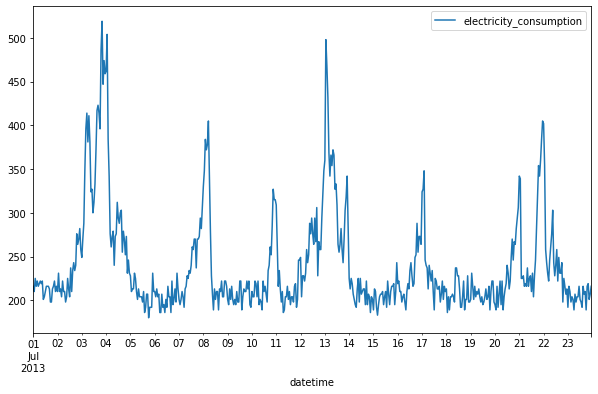

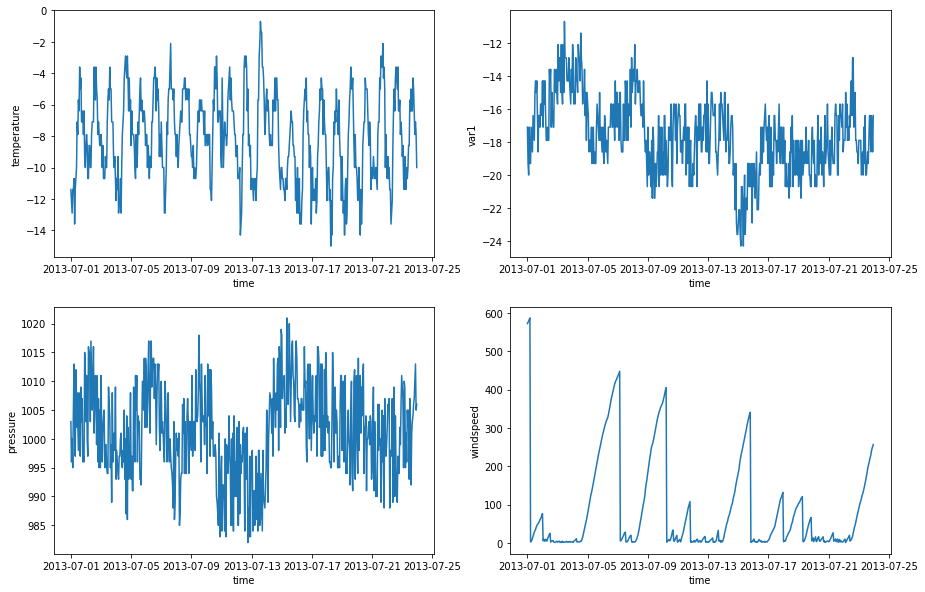

In [16]:
df1['datetime'] = pd.to_datetime(df1['datetime'])
col=['temperature','var1','pressure','windspeed']
df1.plot(x='datetime', y='electricity_consumption')
f = plt.figure(figsize=(15,10))
for i in range(len(col)):
  ax = f.add_subplot(2,2,i+1)
  ax.plot(df1['datetime'], df1[col[i]])
  ax.set_xlabel('time')
  ax.set_ylabel(col[i])

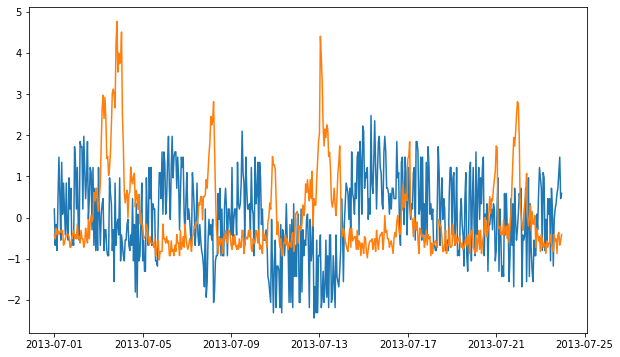

In [17]:
plt.plot(df1['datetime'],df['pressure'] )
plt.plot(df1['datetime'],df['electricity_consumption'])

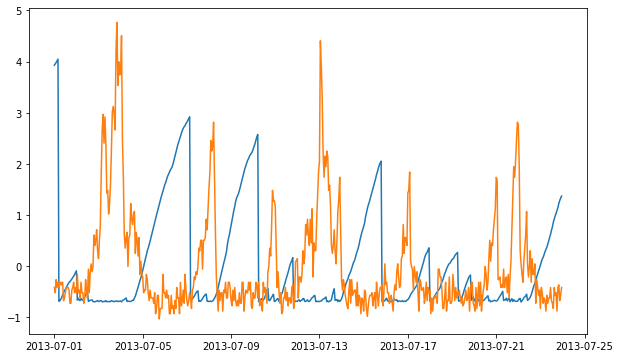

In [18]:
plt.plot(df1['datetime'],df['windspeed'] )
plt.plot(df1['datetime'],df['electricity_consumption'])

This time series doesn't have a genral trend or periodic trend and obviously not a stationary series.<br>
It doen't even contain a reasonable amount of seasonal behaviour (see amplitude is very less).<br>
Random components are larger than seasonal trends.<br>
Because of these reasons, I didn't use any statistical models like VAR.


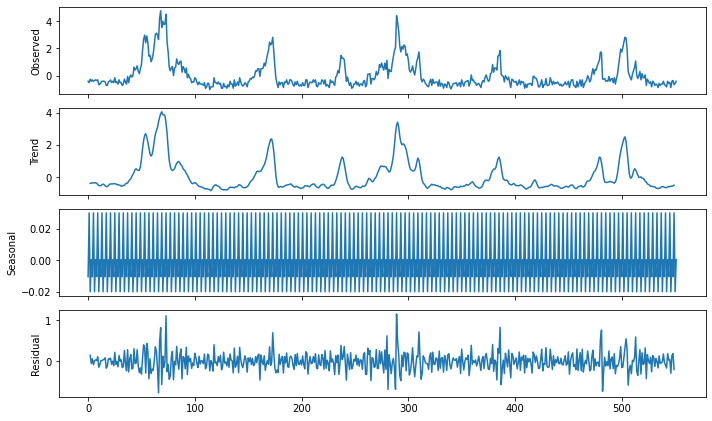

In [19]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df['electricity_consumption'], model='additive', freq=4)
result.plot()
plt.show()

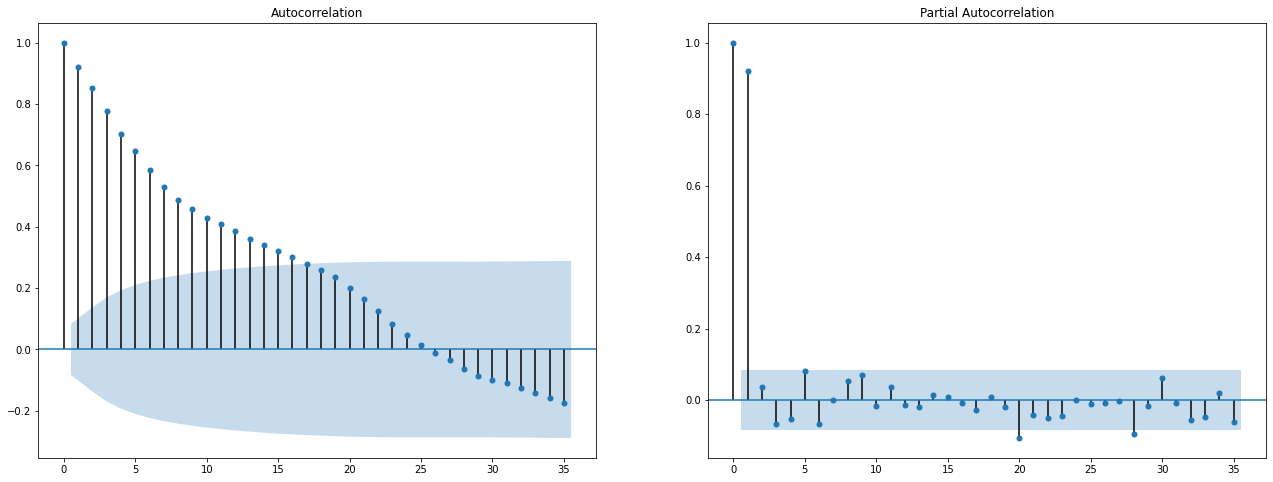

In [20]:
import statsmodels.api as sm

fig, ax = plt.subplots(1,2,figsize=(22,8))
sm.graphics.tsa.plot_acf(df1['electricity_consumption'], lags=35, ax=ax[0])
sm.graphics.tsa.plot_pacf(df1['electricity_consumption'], lags=35, ax=ax[1])
plt.show()

## Preparing and modeling

Let X be the target variable, my features are lags of X upto *n_lag* components (X(t-1),X(t-2),X(t-3),...) and other variables like temperature, windspeed and pressure.<br>
n_lag = 1 is the optimal value for this data. This can also be inferred from PACF plot.<br>
Adding lagged features of windspeed,temperature,etc., didn't approve model's performance.

In [0]:
#Function to prepare data for training
def prepare_data(df, n_lag=1):
  X = df['electricity_consumption'].values
  cols = list(df.columns.values)
  cols.remove('electricity_consumption')
  cols.remove('datetime')
  train_arr =  [ X[i] for i in range(n_lag) ] 
  col_val = [ df[col].iloc[n_lag] for col in cols ]

  train_arr = np.concatenate((train_arr,col_val), axis=0).reshape((1,-1))
  y = [X[n_lag]]
  for i in range(1,len(X)-n_lag):
    tmp = [ X[j] for j in range(i,i+n_lag) ] 
    col_val = [ df[col].iloc[i+n_lag] for col in cols ]
    tmp = np.concatenate((tmp,col_val), axis=0).reshape((1,-1))
    train_arr = np.concatenate((train_arr,tmp), axis=0)
    y.append(X[i+n_lag])
  y = np.asarray(y)
  return train_arr, y

def train_split(X, y, split_ratio=0.1):
  lim_train = X.shape[0] - int(X.shape[0]*split_ratio)
  X_train = X[:lim_train,:]
  X_test = X[lim_train:,:]
  y_train = y[:lim_train]
  y_test = y[lim_train:]

  return X_train, X_test, y_train, y_test

## Models
Models used are Linear Regressor, Neural Network, SVR, kNN Regressor.<br>
Using a stack of models instead of one might produce more general result.<br>
We can also try using LSTMs as they capture all the previous values of every features instead of just using the values at a particular time.

In [22]:
#Importing libraries again to define model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from keras.models import Sequential
from keras.layers import Dense, LeakyReLU, LSTM
from keras import optimizers

Using TensorFlow backend.


In [38]:
n_lag = 1
X_train, y_train = prepare_data(df, n_lag)
X_t = X_train
X_t.shape

(551, 7)

Text(0.5, 0, 'epoch')

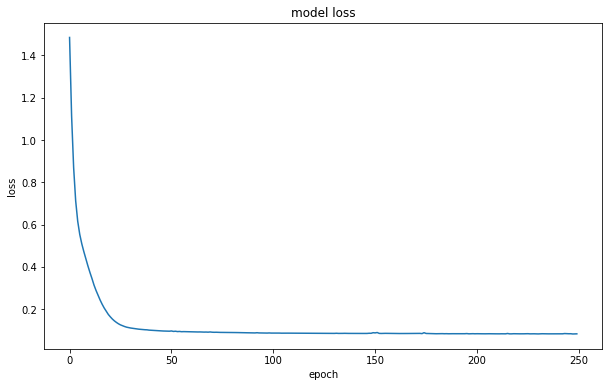

In [39]:
n_cols = X_train.shape[1]

model = Sequential()
model.add(Dense(5, activation='relu', input_shape=(n_cols,)))
model.add(Dense(11, activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')
history = model.fit(X_train, y_train, epochs=250, verbose=0)
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

In [40]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [41]:
clf = SVR()
clf.fit(X_train, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [42]:
knn = KNeighborsRegressor(n_neighbors=2)
knn.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                    weights='uniform')

In [0]:
l1 = [ X_t[0,i] for i in range(n_lag) ]
preds_nn_f = []
for i in range(X_t.shape[0]):
  tmp = [ X_t[i,j] for j in range(n_lag,X_t.shape[1]) ]
  tmp = np.concatenate((l1,tmp), axis=0)
  tmp = tmp.reshape((1,-1))
  prediction = model.predict(tmp)
  preds_nn_f.append(prediction[0][0])
  del l1[0]
  l1.append(prediction[0][0])
preds_nn_f = np.asarray(preds_nn_f)

In [0]:
l1 = [ X_t[0,i] for i in range(n_lag) ]
preds_lr_f = []
for i in range(X_t.shape[0]):
  tmp = [ X_t[i,j] for j in range(n_lag,X_t.shape[1]) ]
  tmp = np.concatenate((l1,tmp), axis=0)
  tmp = tmp.reshape((1,-1))
  prediction = lr.predict(tmp)
  preds_lr_f.append(prediction[0])
  del l1[0]
  l1.append(prediction[0])
preds_lr_f = np.asarray(preds_lr_f)

In [0]:
l1 = [ X_t[0,i] for i in range(n_lag) ]
preds_svr_f = []
for i in range(X_t.shape[0]):
  tmp = [ X_t[i,j] for j in range(n_lag,X_t.shape[1]) ]
  tmp = np.concatenate((l1,tmp), axis=0)
  tmp = tmp.reshape((1,-1))
  prediction = clf.predict(tmp)
  preds_svr_f.append(prediction[0])
  del l1[0]
  l1.append(prediction[0])
preds_svr_f = np.asarray(preds_svr_f)

In [0]:
l1 = [ X_t[0,i] for i in range(n_lag) ]
preds_knn_f = []
for i in range(X_t.shape[0]):
  tmp = [ X_t[i,j] for j in range(n_lag,X_t.shape[1]) ]
  tmp = np.concatenate((l1,tmp), axis=0)
  tmp = tmp.reshape((1,-1))
  prediction = knn.predict(tmp)
  preds_knn_f.append(prediction[0])
  del l1[0]
  l1.append(prediction[0])
preds_knn_f = np.asarray(preds_knn_f)

In [0]:
ms.fit(df1['electricity_consumption'].values.reshape((-1,1)))
ytr = ms.inverse_transform(y_train.reshape((-1,1)))
preds_nn_f = ms.inverse_transform(preds_nn_f.reshape((-1,1)))
preds_lr_f = ms.inverse_transform(preds_lr_f.reshape((-1,1)))
preds_svr_f = ms.inverse_transform(preds_svr_f.reshape((-1,1)))
preds_knn_f = ms.inverse_transform(preds_knn_f.reshape((-1,1)))

We can see from the plots that Neural Network does a decent job (way better than linear regression) and SVM and KNN produce fairly good results.

MSE in LR model : 2336.946131812078
MSE in NN model : 1598.6287498491201
MSE in SVR model : 1274.9481132721965
MSE in KNN model : 1109.315335753176


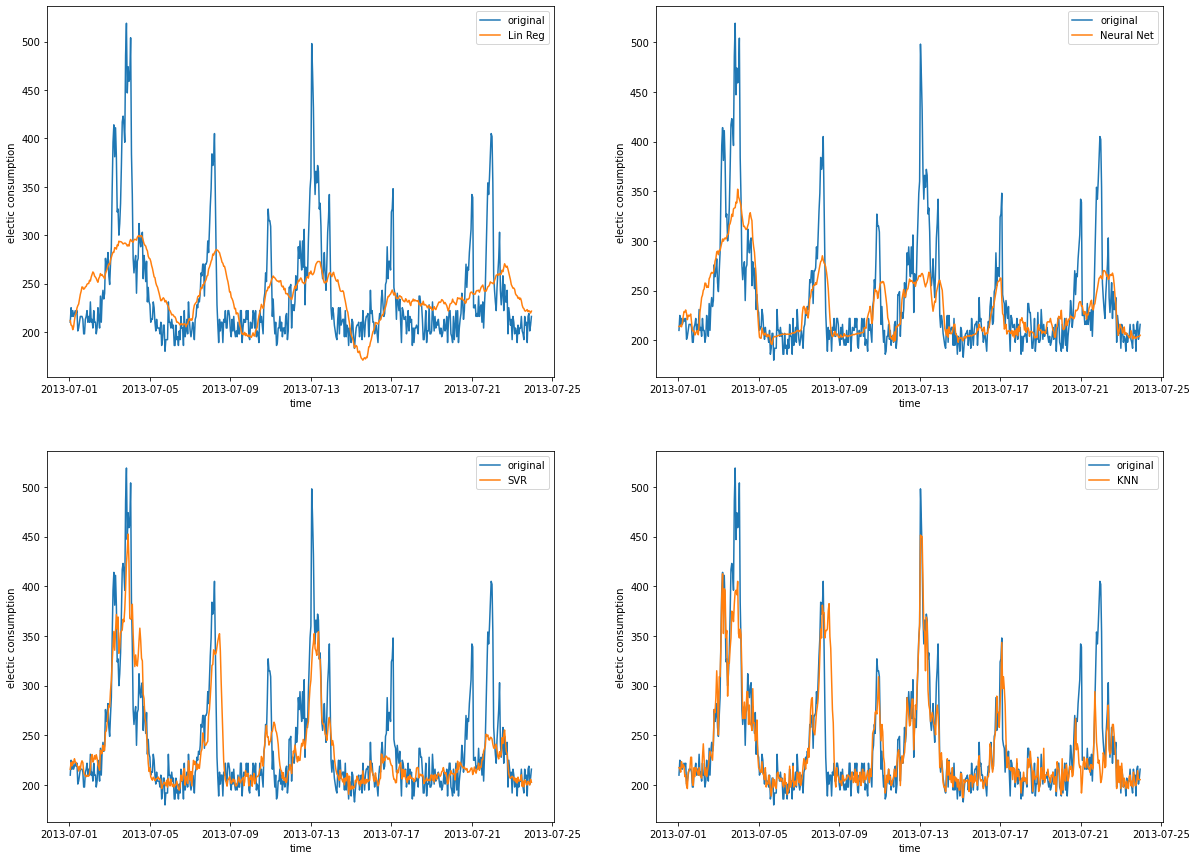

In [33]:
print('MSE in LR model : '+str(mse(preds_lr_f,ytr)))
print('MSE in NN model : '+str(mse(preds_nn_f,ytr)))
print('MSE in SVR model : '+str(mse(preds_svr_f,ytr)))
print('MSE in KNN model : '+str(mse(preds_knn_f,ytr)))
f = plt.figure(figsize=(20,15))
preds = [preds_lr_f, preds_nn_f, preds_svr_f, preds_knn_f]
labels = [ 'Lin Reg', 'Neural Net', 'SVR', 'KNN' ]
for i in range(4):
  ax = f.add_subplot('22'+str(i+1))
  ax.plot(df1['datetime'].values[n_lag:],ytr,label='original')
  ax.plot(df1['datetime'].values[n_lag:],preds[i],label=labels[i])
  ax.set_xlabel('time')
  ax.set_ylabel('electic consumption')
  plt.legend()
plt.show()

## Forecasting
I have used an ensemble of SVR and kNN model to forecast values, as using a stack of models provided better results than either of them (more weight to SVR was given).<br>

Didn't use continual learning as the model's performance was poor, this might be beacause of the unavailable data for the last 7-8 days of the month or the data might have dominant monthly trend than yearwise.

In [34]:
#Function to get no. of days in a month
import datetime
def days_in_month(year, month):
    def month_december(month):
        if month > 12:
            return month-12  #minus 12 if cross year.
        else:
            return month
    def year_december(year, month):
        if month > 12:
            return year + 1
        else:
            return year
    #verify if month/year is valid
    if (month < 1) or (month > 12):
        print ("please enter a valid month")
    elif (year < 1) or (year > 9999):
        print ("please enter a valid year between 1 - 9999")
    else:
        #subtract current month from next month then get days
        date1 = (datetime.date(year_december(year, month+1), month_december(month+1), 1) - datetime.date(year, month, 1)).days
        return (date1)

year= 2012;month=2
print('No. of days in '+ str(month)+ '/' +str(year)+' = '+str(days_in_month(2012, 2)))

No. of days in 2/2012 = 29


In [0]:
def get_models(n_cols):
  model1 = Sequential()
  model1.add(Dense(5, activation='relu', input_shape=(n_cols,)))
  model1.add(Dense(11, activation='relu'))
  model1.add(Dense(1))

  model2 = Sequential()
  model2.add(Dense(8, activation='relu', input_shape=(n_cols,)))
  model2.add(Dense(16, activation='relu'))
  model2.add(Dense(1))

  model1.compile(optimizer='adam', loss='mse')
  model2.compile(optimizer='adam', loss='mse')

  return model1, model2

In [36]:
test_cnt = 0
ans1, ans2 = [], []
for i in range(train_df.shape[0]//(23*24)):
  print('Forecasting month '+ str(i+1) +' of ' + str(train_df.shape[0]//(23*24)))
  df = train_df.iloc[i*23*24:(i+1)*23*24]
  df = df.copy()
  df1 = df.copy()
  df1['datetime'] = pd.to_datetime(df1['datetime'])

  month = df1['datetime'].iloc[0].month
  year = df1['datetime'].iloc[0].year
  days = days_in_month(year, month)
  days -= 23
  tdf = test_df.iloc[test_cnt*24:(test_cnt+days)*24]
  tdf = tdf.copy()
  tdf1 = tdf.copy()
  test_cnt += (days)

  if(df['var2_1'].nunique()==1):
    df = df.drop(['var2_1'], axis=1)
    tdf = tdf.drop(['var2_1'], axis=1)
  if(df['var2_2'].nunique()==1):
    df = df.drop(['var2_2'], axis=1)
    tdf = tdf.drop(['var2_2'], axis=1)
  if(df['var2_3'].nunique()==1):
    df = df.drop(['var2_3'], axis=1)
    tdf = tdf.drop(['var2_3'], axis=1)
  
  cols = list(df.columns.values)
  cols.remove('datetime')
  cols.remove('electricity_consumption')
  for j in cols:
    df[[j]] = ms.fit_transform(df[[j]])
    tdf[[j]] = ms.transform(tdf[[j]])
  df[['electricity_consumption']] = ms.fit_transform(df[['electricity_consumption']])

  n_lag = 1
  X_train, y_train = prepare_data(df, n_lag)
  X_t = X_train
  n_cols = X_train.shape[1]
  
  model1, model2  = get_models(n_cols)
  clf = KNeighborsRegressor(n_neighbors=8,p=3)
  svr = SVR()
  clf.fit(X_train, y_train)
  svr.fit(X_train, y_train)

  X = tdf.values
  y = df['electricity_consumption'].values
  l1 = [ y[-n_lag+j] for j in range(n_lag) ]
  l2 = l1[:]
  cols = list(tdf.columns.values)
  cols.remove('datetime')
  col_val = [tdf[col].iloc[0] for col in cols]
  preds1 = [svr.predict(np.concatenate((l1,col_val), axis=0).reshape((1,-1)))[0]]
  preds2 = [clf.predict(np.concatenate((l2,col_val), axis=0).reshape((1,-1)))[0]]
  for j in range(1,tdf.shape[0]):
    del l1[0];del l2[0]
    l1.append(preds1[-1])
    l2.append(preds2[-1])
    col_val = [tdf[col].iloc[j] for col in cols]

    preds1.append(svr.predict(np.concatenate((l1,col_val), axis=0).reshape((1,-1)))[0])
    preds2.append(clf.predict(np.concatenate((l2,col_val), axis=0).reshape((1,-1)))[0])

  ms.fit(df1['electricity_consumption'].values.reshape((-1,1)))
  preds_nn1 = ms.inverse_transform(np.asarray(preds1).reshape((-1,1)))
  preds_nn2 = ms.inverse_transform(np.asarray(preds2).reshape((-1,1)))
  
  ans1.extend(list(preds_nn1))
  ans2.extend(list(preds_nn2))

preds1 = [i[0] for i in ans1]
preds2 = [i[0] for i in ans2]

Forecasting month 1 of 48
Forecasting month 2 of 48
Forecasting month 3 of 48
Forecasting month 4 of 48
Forecasting month 5 of 48
Forecasting month 6 of 48
Forecasting month 7 of 48
Forecasting month 8 of 48
Forecasting month 9 of 48
Forecasting month 10 of 48
Forecasting month 11 of 48
Forecasting month 12 of 48
Forecasting month 13 of 48
Forecasting month 14 of 48
Forecasting month 15 of 48
Forecasting month 16 of 48
Forecasting month 17 of 48
Forecasting month 18 of 48
Forecasting month 19 of 48
Forecasting month 20 of 48
Forecasting month 21 of 48
Forecasting month 22 of 48
Forecasting month 23 of 48
Forecasting month 24 of 48
Forecasting month 25 of 48
Forecasting month 26 of 48
Forecasting month 27 of 48
Forecasting month 28 of 48
Forecasting month 29 of 48
Forecasting month 30 of 48
Forecasting month 31 of 48
Forecasting month 32 of 48
Forecasting month 33 of 48
Forecasting month 34 of 48
Forecasting month 35 of 48
Forecasting month 36 of 48
Forecasting month 37 of 48
Forecastin

In [37]:
sub = []
for i in range(len(preds2)):
  sub.append( (1.5*preds1[i] + preds2[i])/2.5 )
predictions = pd.DataFrame({'ID':ids,'electricity_consumption':sub})
predictions.to_csv('preds.csv',index=False)
predictions.tail(3)

,ID,electricity_consumption
8565,35061,196.804048
8566,35062,195.931979
8567,35063,197.603315
